<a href="https://colab.research.google.com/github/sabbaninikhitha/2216160_AIML_Bootcamp_2023/blob/main/malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
#reading and printing
df=pd.read_csv("/content/drive/MyDrive/outbreak_detect.csv")
df.head(20)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes
6,31.0,24.0,88.77,41.40,10881,648,Yes
7,33.0,24.0,77.94,23.88,8830,459,Yes
8,31.0,24.0,84.57,11.15,9693,482,No
9,36.0,24.0,53.40,2.12,9310,549,No


In [4]:
#data processing 

from sklearn import preprocessing
L=preprocessing.LabelEncoder()
#converting outbreak column to numbers 1 and 0
df.Outbreak=L.fit_transform(df.Outbreak)
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
3,NaN,24.0,84.57,11.15,9693,482,0
4,34.0,24.0,59.16,9.06,4198,211,0


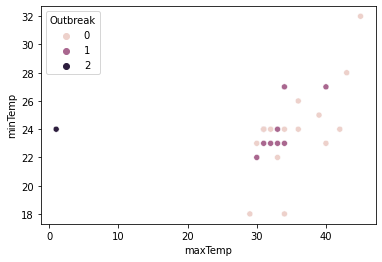

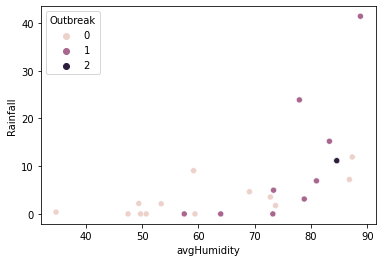

In [5]:
#visualization 
import matplotlib.pyplot as plt
import seaborn as sns
def plot_vs(frame,col1,col2,hue):
  plt.figure()
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
plot_vs(df,"maxTemp","minTemp","Outbreak")
plot_vs(df,"avgHumidity","Rainfall","Outbreak")

In [6]:
df = df.dropna()

In [7]:
#loading the data
x=df.iloc[::-1].values
y=np.array(df[["Outbreak"]])

In [8]:
x

array([[1.0000e+00, 2.4000e+01, 8.4570e+01, 1.1150e+01, 9.6930e+03,
        4.8200e+02, 2.0000e+00],
       [3.3000e+01, 2.2000e+01, 7.3710e+01, 1.7500e+00, 9.2330e+03,
        2.1200e+02, 0.0000e+00],
       [3.0000e+01, 2.2000e+01, 7.8800e+01, 3.1200e+00, 1.1265e+04,
        4.0400e+02, 1.0000e+00],
       [3.0000e+01, 2.3000e+01, 8.6810e+01, 7.2100e+00, 9.0410e+03,
        4.1800e+02, 0.0000e+00],
       [3.1000e+01, 2.3000e+01, 7.3350e+01, 4.9700e+00, 1.0659e+04,
        6.1200e+02, 1.0000e+00],
       [3.6000e+01, 2.6000e+01, 7.2780e+01, 3.5400e+00, 5.1380e+03,
        2.1300e+02, 0.0000e+00],
       [3.9000e+01, 2.5000e+01, 4.7520e+01, 0.0000e+00, 8.1310e+03,
        3.1200e+02, 0.0000e+00],
       [4.0000e+01, 2.7000e+01, 6.3970e+01, 0.0000e+00, 1.1169e+04,
        7.7600e+02, 1.0000e+00],
       [3.2000e+01, 2.4000e+01, 8.7320e+01, 1.1920e+01, 6.5360e+03,
        3.3800e+02, 0.0000e+00],
       [3.3000e+01, 2.3000e+01, 8.0970e+01, 6.9200e+00, 1.0990e+04,
        3.9000e+02, 1.0

In [9]:
y

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [2]])

In [10]:
#spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [11]:
#build model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [12]:
#training the model
clf.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred=clf.predict(x_test)

In [14]:
clf.score(x,y)

0.6666666666666666

<AxesSubplot:xlabel='Rainfall', ylabel='avgHumidity'>

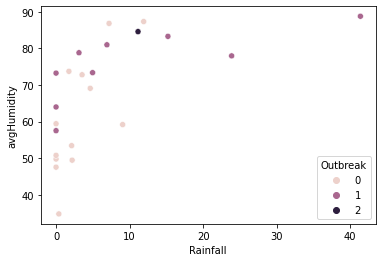

In [15]:
sns.scatterplot(x="Rainfall",
                    y="avgHumidity",
                    hue="Outbreak",legend = 'brief',
                    data=df)

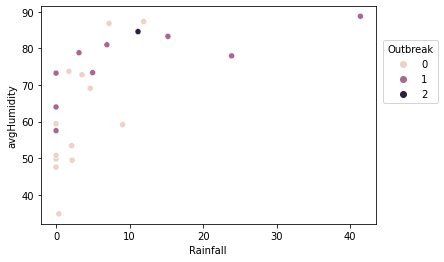

In [16]:
sns.scatterplot(x="Rainfall",
                    y="avgHumidity",
                    hue="Outbreak",legend = 'brief',
                    data=df)
plt.legend(loc='center right',title = 'Outbreak',bbox_to_anchor=(1.20, 0.70))

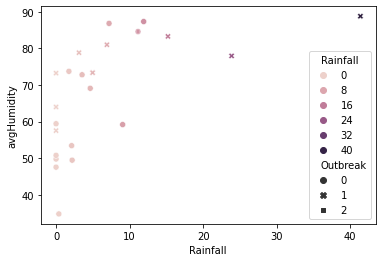

In [18]:
sns.scatterplot(data=df, x="Rainfall", y="avgHumidity",hue="Rainfall",style="Outbreak")
plt.show()